### Cat classifier Neural Network in TensorFlow

#### Load dependencies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
np.random.seed(1)



#### Load data

In [2]:
#load data set
from lr_utils import load_dataset
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y = 1. It's a cat picture.


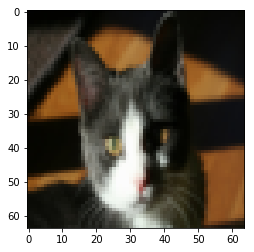

In [3]:
index = 19
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
X_train = train_x_orig.reshape(train_x_orig.shape[0], -1)
X_train =np.divide(X_train, 255)
Y_train =train_y.T

In [5]:
X_train.shape, Y_train.shape

((209, 12288), (209, 1))

In [6]:
X_test = test_x_orig.reshape(test_x_orig.shape[0], -1)
X_test=np.divide(X_test, 255)
Y_test = test_y.T


In [7]:
X_test.shape, Y_test.shape

((50, 12288), (50, 1))

#### Set neural network hyperparameters

In [8]:
lr = 0.9
epochs = 200
weight_initializer = tf.contrib.layers.xavier_initializer()

#### Set parameters for each layer

In [9]:
n_input = 12288
n_dense_1 = 64
n_dense_2 = 64
n_classes = 1


#### Define placeholder Tensors for inputs and labels

In [10]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None,n_classes])

#### Define dictionaries for storing weights and biases for each layer -- and initialize

In [11]:
bias_dict = {'b1': tf.Variable(tf.zeros([n_dense_1])), 
    'b2': tf.Variable(tf.zeros([n_dense_2])),
    'b_out': tf.Variable(tf.zeros([n_classes]))
}
    


weight_dict = {
    'W1': tf.get_variable('W1', [n_input, n_dense_1], initializer=weight_initializer),
    'W2': tf.get_variable('W2', [n_dense_1, n_dense_2], initializer=weight_initializer),
    'W_out': tf.get_variable('W_out', [n_dense_2, n_classes], initializer=weight_initializer)
}

#### Define types of layers

In [12]:
# dense layer with ReLU activation:
def dense(x, W, b):
    z = tf.add(tf.matmul(x, W), b)
    a = tf.nn.relu(z)
    return a


#### Design neural network architecture

In [13]:
def network(x, weights, biases):

    # reshape linear MNIST pixel input into square image: 
    dense_1 = dense(x, weights['W1'], biases['b1'])
    dense_2 = dense(dense_1, weights['W2'], biases['b2'])
    
    
    # output layer: 
    out_layer_z = tf.nn.sigmoid(tf.add(tf.matmul(dense_2, weights['W_out']), biases['b_out']))
    
    return out_layer_z

#### Build model

In [14]:
predictions = network(x, weights=weight_dict, biases=bias_dict)

#### Define model's loss and its optimizer

In [15]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

#### Define evaluation metrics

In [16]:
correct_prediction = tf.equal(tf.round(predictions),y )
accuracy_pct = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) * 100

#### Create op for variable initialization

In [17]:
initializer_op = tf.global_variables_initializer()

#### Train the network in a session (identical to `intermediate_net_in_tensorflow.ipynb` except addition of `display_progress`)

In [18]:
with tf.Session() as session:
    session.run(initializer_op)
    
    print("Training for", epochs, "epochs.")
    
    # loop over epochs: 
    for epoch in range(epochs):
        

            
            # feed batch data to run optimization and fetching cost and accuracy: 
        _, cost_score, accuracy = session.run([optimizer, cost, accuracy_pct], 
                                                   feed_dict={x: X_train, y: Y_train})
            
           
            
        # output logs at end of each epoch of training:
        print("Epoch ", '%03d' % (epoch+1), 
              ": cost = ", '{:.3f}'.format(cost_score), 
              ", accuracy = ", '{:.2f}'.format(accuracy), "%", 
              sep='')
    
    print("Training Complete. Testing Model.\n")
    
    test_cost = cost.eval({x: X_test, y: Y_test})
    test_accuracy_pct = accuracy_pct.eval({x: X_test, y: Y_test})
    
    print("Test Cost:", '{:.3f}'.format(test_cost))
    print("Test Accuracy: ", '{:.2f}'.format(test_accuracy_pct), "%", sep='')

Training for 200 epochs.
Epoch 001: cost = 0.786, accuracy = 61.72%
Epoch 002: cost = 0.693, accuracy = 65.55%
Epoch 003: cost = 0.693, accuracy = 65.55%
Epoch 004: cost = 0.693, accuracy = 65.55%
Epoch 005: cost = 0.693, accuracy = 65.55%
Epoch 006: cost = 0.693, accuracy = 65.55%
Epoch 007: cost = 0.693, accuracy = 65.55%
Epoch 008: cost = 0.693, accuracy = 65.55%
Epoch 009: cost = 0.693, accuracy = 65.55%
Epoch 010: cost = 0.693, accuracy = 65.55%
Epoch 011: cost = 0.693, accuracy = 65.55%
Epoch 012: cost = 0.693, accuracy = 65.55%
Epoch 013: cost = 0.693, accuracy = 65.55%
Epoch 014: cost = 0.693, accuracy = 65.55%
Epoch 015: cost = 0.693, accuracy = 65.55%
Epoch 016: cost = 0.693, accuracy = 65.55%
Epoch 017: cost = 0.693, accuracy = 65.55%
Epoch 018: cost = 0.693, accuracy = 65.55%
Epoch 019: cost = 0.693, accuracy = 65.55%
Epoch 020: cost = 0.693, accuracy = 65.55%
Epoch 021: cost = 0.693, accuracy = 65.55%
Epoch 022: cost = 0.693, accuracy = 65.55%
Epoch 023: cost = 0.693, accu

In [ ]:
#### Compare with LeNet Keras results

#### Increase dropout probability(/ies) or add dropout to other conv layer? Stop earlier? Coming up in Lecture 5 :)

#### As an exercise, try converting our [AlexNet](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/alexnet_in_keras.ipynb) from Keras to TensorFlow following the same style as this LeNet-5 notebook. 